<a href="https://colab.research.google.com/github/YuzhiSun/scInfer_colab/blob/main/Unpaired_benchmark_breast.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/YuzhiSun/scInfer_colab/blob/main/Unpaired_benchmark_breast.ipynb)

In [1]:
! git clone https://github.com/YuzhiSun/scInfer_colab.git

fatal: destination path 'scInfer_colab' already exists and is not an empty directory.


In [2]:
%cd /content/scInfer_colab/

/content/scInfer_colab


In [3]:
import os
project_path = '/content/scInfer_colab/'
os.chdir(project_path)

In [4]:
!pip install numpy==1.26.0

In [5]:
!pip install torch==2.2.1 torchvision==0.17.1 torchaudio==2.2.1 --index-url https://download.pytorch.org/whl/cu121

Looking in indexes: https://download.pytorch.org/whl/cu121


In [6]:
import torch
torch.__version__

'2.2.1+cu121'

In [7]:
import os

In [8]:
! pip install scanpy==1.11.0

INFO: pip is looking at multiple versions of umap-learn to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 172.3/172.3 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 133.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 276.4/276.4 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.8/8.8 MB 86.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 kB 5.8 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.6.1
    Uninstalling scikit-learn-1.6.1:
      Successfully uninstalled scikit-learn-1.6.1
  Attempting uninstall: umap-learn
    Found e

In [9]:
import scanpy as sc
from torch.utils import data
import torch
import torch.optim as optim
import warnings

/usr/local/lib/python3.12/dist-packages/scanpy/_utils/__init__.py:35: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  from anndata import __version__ as anndata_version
/usr/local/lib/python3.12/dist-packages/scanpy/__init__.py:24: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):
/usr/local/lib/python3.12/dist-packages/scanpy/readwrite.py:15: FutureWarning: `__version__` is deprecated, use `importlib.metadata.version('anndata')` instead.
  if Version(anndata.__version__) >= Version("0.11.0rc2"):


In [10]:
warnings.filterwarnings("ignore")
from scInferCode.model import *
from scInferCode.utils import *

In [11]:
!gdown --fuzzy https://drive.google.com/file/d/1PsL-Sa_G9spvV36TUhdwYiI-6jz7hE0m/view?usp=drive_link

Downloading...
From (original): https://drive.google.com/uc?id=1PsL-Sa_G9spvV36TUhdwYiI-6jz7hE0m
From (redirected): https://drive.google.com/uc?id=1PsL-Sa_G9spvV36TUhdwYiI-6jz7hE0m&confirm=t&uuid=8678f97b-1c6e-412f-a74e-1a2f77155c8b
To: /content/scInfer_colab/breast_four_celltypes.h5ad
100% 471M/471M [00:08<00:00, 57.3MB/s]


In [12]:
!gdown --fuzzy https://drive.google.com/file/d/1yn8_A2V6DiGCjf_xp3R1MSL1ee6S-SR5/view?usp=drive_link

Downloading...
From: https://drive.google.com/uc?id=1yn8_A2V6DiGCjf_xp3R1MSL1ee6S-SR5
To: /content/scInfer_colab/scMS_monoctye_macrophage_epithelial_mesenchymal.h5ad
100% 1.42M/1.42M [00:00<00:00, 12.1MB/s]


In [ ]:
!gdown --fuzzy https://drive.google.com/file/d/1A5PCuC4THRsKEKJ9aXQp6KESRI-igaVW/view?usp=sharing

In [13]:
rna = sc.read_h5ad('/content/scInfer_colab/breast_four_celltypes.h5ad')

In [14]:

scMS = sc.read_h5ad('/content/scInfer_colab/scMS_monoctye_macrophage_epithelial_mesenchymal.h5ad')

In [15]:
rna_ids, protein_ids = make_rna_prt_index(rna, scMS)

Counts of all celltype in rna:
              count
celltype          
epithelial    3205
macrophage    5493
mesenchymal   2830
monocyte      2200
Counts of all celltype in protein:
              count
celltype          
macrophage     130
monocyte       130
epithelial     139
mesenchymal    131


In [16]:
rna_train_ids, rna_test_ids = make_train_test_id(rna_ids, by='celltype', test_frac=0.5)

In [17]:
scMS_train_ids, scMS_test_ids = make_train_test_id(protein_ids, by='celltype', test_frac=0.5)

In [18]:
sample_df = make_paired_samples_for_benchmark(rna_train_ids, scMS_train_ids,celltype='celltype', sample_nums=15000)

neg_samples:60000, pos_samples:60000


In [19]:
train_dataset, valid_dataset, rna_df, protein_df = make_scInfer_dataset(rna, scMS, sample_df, rna_vars='highly_variable', protein_vars='importance', test_size=0.3, random_state=2024)

### 开始训练

In [20]:
input_size = train_dataset.get_size()
batch_size = 512
hidden_size = 256
embedding_size = 32
num_epochs = 100
margin = 1.0
learning_rate = 0.001
patience = 10
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [21]:
model = ContrastiveNetwork(input_size, hidden_size, embedding_size).to(device)
criterion = ContrastiveLoss(margin)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [22]:
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(
    valid_dataset,
    batch_size=batch_size, shuffle=False)

In [23]:
input_size

{'protein': 127, 'rna': 2529}

In [24]:
device

device(type='cuda')

In [25]:
model = train_embeddings(num_epochs, optimizer, device, model, criterion, train_loader, test_loader, patience=patience, plot_line=True)

Training:  14%|█▍        | 14/100 [06:10<37:53, 26.44s/epoch, train_loss=0.0000020335, test_loss=0.0000032811, lr=0.000810]


KeyboardInterrupt: 

In [39]:
model_path = f'/content/scInfer_colab/Unpaired_Benchmark_Breast.pth'

#### 注意 这里如果确定了最终的模型参数，就将保存的代码注释掉，防止将固定好的模型参数覆盖

In [40]:
# torch.save(model.state_dict(), model_path)

In [41]:
model = ContrastiveNetwork(input_size, hidden_size, embedding_size).to(device)
model.load_state_dict(torch.load(model_path))
model.eval()

ContrastiveNetwork(
  (protein_branch): Sequential(
    (0): Linear(in_features=127, out_features=32, bias=True)
    (1): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
  )
  (rna_branch): Sequential(
    (0): Linear(in_features=2529, out_features=512, bias=True)
    (1): BatchNorm1d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Linear(in_features=512, out_features=256, bias=True)
    (4): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Linear(in_features=256, out_features=32, bias=True)
    (7): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU()
  )
)

In [42]:
rna_em_ann, protein_em_ann = make_embeddings(model, device, rna_df, protein_df, rna, scMS, celltype = 'celltype')

In [43]:
rna_em_ann.obs['test_flag'] = rna_em_ann.obs.merge(rna_test_ids, left_index=True, right_on='index',how='left')['celltype_y'].notnull().astype(int).tolist()

In [44]:
protein_em_ann.obs['test_flag'] = protein_em_ann.obs.merge(scMS_test_ids, left_index=True, right_on='index',how='left')['celltype_y'].notnull().astype(int).tolist()

In [45]:
rna_em_ann.write('/content/scInfer_colab/contrast_rna_feas_breast.h5ad')

In [46]:
protein_em_ann.write('/content/scInfer_colab/contrast_scms_feas_breast.h5ad')

### 对整合结果进行验证

In [47]:
contrast_scrna_ann = sc.read_h5ad('/content/scInfer_colab/contrast_rna_feas_breast.h5ad')
contrast_scms_ann = sc.read_h5ad('/content/scInfer_colab/contrast_scms_feas_breast.h5ad')
contrast_scrna_ann = contrast_scrna_ann[contrast_scrna_ann.obs['test_flag'] == 1]
contrast_scms_ann = contrast_scms_ann[contrast_scms_ann.obs['test_flag'] == 1]
contrast_scrna_ann.obs['src'] = 'scseq'
contrast_scms_ann.obs['src'] = 'scms'

In [48]:
contrast_ann = sc.concat([contrast_scrna_ann, contrast_scms_ann])

In [49]:
sc.tl.tsne(contrast_ann, metric='cosine')

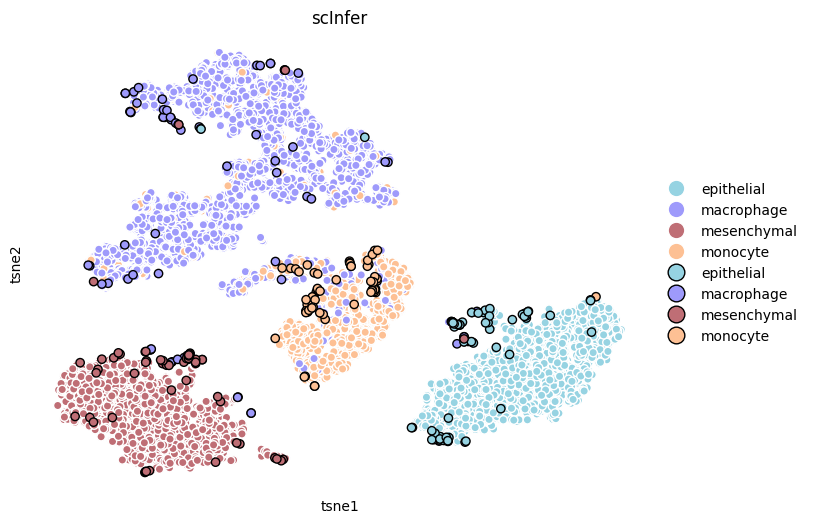

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 合并数据用于 t-SNE 绘图
data = contrast_ann.obs.merge(
    pd.DataFrame(
        contrast_ann.obsm['X_tsne'],
        columns=['tsne1', 'tsne2'],
        index=contrast_ann.obs_names
    ),
    how='left',
    left_index=True,
    right_index=True
)
df = data

# 定义用于映射边缘颜色的字典，并添加默认颜色
edge_color_dict = {'scms': 'black', 'scseq': 'white'}
# 定义celltype的自定义颜色调色板
custom_palette = {
    'epithelial': '#96d3e2',
    'macrophage': '#9e9afb',
    'mesenchymal': '#bf6e75',
    'monocyte': '#fdc094'

}
plt.figure(figsize=(8, 6))

# 循环遍历每个 `src` 类型并单独绘制散点图
for src_type in df['src'].unique():
    subset = df[df['src'] == src_type]
    edge_color = edge_color_dict.get(src_type, 'black')  # 默认使用黑色边缘
    sns.scatterplot(
        data=subset,
        x='tsne1',
        y='tsne2',
        hue='celltype',
        palette=custom_palette,
        markers=True,
        alpha=1,
        edgecolor=edge_color,
        linewidth=1  # 设置边缘宽度以区分
    )

# 去除灰色背景和横纵坐标刻度
plt.gca().set_facecolor('white')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# 去除 x 轴和 y 轴的刻度线和刻度标签
plt.gca().set_xticks([])
plt.gca().set_yticks([])

# 添加图例和标签
plt.legend(frameon=False, loc='center left', bbox_to_anchor=(1, 0.5), markerscale=2)
plt.xlabel('tsne1')
plt.ylabel('tsne2')
plt.title('scInfer')
plt.gca().tick_params(left=False, bottom=False)
# plt.savefig('./data/figure/scInfer_scatter_breast.jpg', dpi=300)
# 显示图形
plt.show()

In [51]:
!pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.7/5.7 MB 82.9 MB/s eta 0:00:00


In [53]:
!pip install leidenalg

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 41.3 MB/s eta 0:00:00


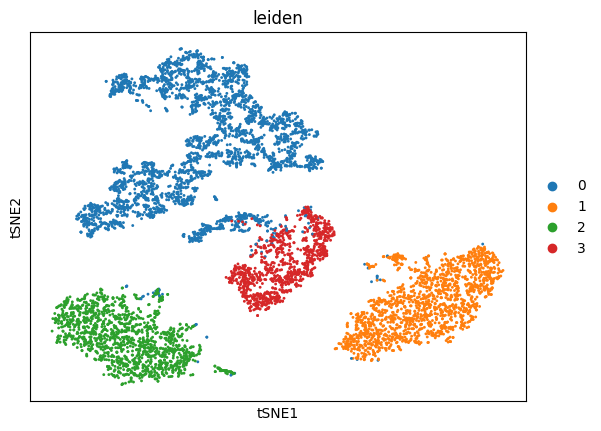

Adjusted Rand Index (ARI): 0.8598179061747511
Normalized Mutual Information (NMI): 0.8616769519864633
Silhouette Score: 0.7189495


In [54]:
from sklearn import metrics

ann_data = contrast_ann
sc.pp.neighbors(ann_data, n_neighbors=10, n_pcs=40)
sc.tl.tsne(ann_data, metric='cosine')
sc.tl.leiden(ann_data, resolution=0.01)
sc.pl.tsne(ann_data, color=['leiden'])
true_labels, cluster_labels = ann_data.obs['celltype'], ann_data.obs['leiden']
# 计算Adjusted Rand Index (ARI)
ari = metrics.adjusted_rand_score(true_labels, cluster_labels)

# 计算Normalized Mutual Information (NMI)
nmi = metrics.normalized_mutual_info_score(true_labels, cluster_labels)

# 计算Silhouette Score
silhouette = metrics.silhouette_score(ann_data.to_df(), cluster_labels)

# 输出评价指标
print("Adjusted Rand Index (ARI):", ari)
print("Normalized Mutual Information (NMI):", nmi)
print("Silhouette Score:", silhouette)